### Stock Market Prediction Using The Stacked LSTM

In [2]:
### Data Collection
import pandas_datareader as pdr
key="95e463600dac329bb00a1830ae4051fff3d095c7"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key= key)

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-30 00:00:00+00:00,106.00,106.5000,105.50,105.80,24863945,24.848285,24.965494,24.731076,24.801401,99455780,0.0,1.0
1,AAPL,2016-08-31 00:00:00+00:00,106.10,106.5699,105.64,105.66,29662406,24.871727,24.981880,24.763894,24.768583,118649624,0.0,1.0
2,AAPL,2016-09-01 00:00:00+00:00,106.73,106.8000,105.62,106.14,26701523,25.019410,25.035819,24.759206,24.881103,106806092,0.0,1.0
3,AAPL,2016-09-02 00:00:00+00:00,107.73,108.0000,106.82,107.70,26802450,25.253828,25.317120,25.040507,25.246795,107209800,0.0,1.0
4,AAPL,2016-09-06 00:00:00+00:00,107.70,108.3000,107.51,107.90,26880391,25.246795,25.387446,25.202256,25.293679,107521564,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-08-23 00:00:00+00:00,149.71,150.19,147.89,148.31,60131810,149.71,150.19,147.89,148.31,60131810,0.0,1.0
1254,AAPL,2021-08-24 00:00:00+00:00,149.62,150.86,149.15,149.45,48606428,149.62,150.86,149.15,149.45,48606428,0.0,1.0
1255,AAPL,2021-08-25 00:00:00+00:00,148.36,150.32,147.80,149.81,58991297,148.36,150.32,147.80,149.81,58991297,0.0,1.0
1256,AAPL,2021-08-26 00:00:00+00:00,147.54,149.12,147.51,148.35,48597195,147.54,149.12,147.51,148.35,48597195,0.0,1.0
1257,AAPL,2021-08-27 00:00:00+00:00,148.60,148.75,146.83,147.48,55802388,148.60,148.75,146.83,147.48,55802388,0.0,1.0


In [45]:
df1=df.reset_index()['open']

In [46]:
print(df1)

0       105.80
1       105.66
2       106.14
3       107.70
4       107.90
         ...  
1253    148.31
1254    149.45
1255    149.81
1256    148.35
1257    147.48
Name: open, Length: 1258, dtype: float64


In [47]:
df1.shape

(1258,)

In [48]:
import matplotlib.pyplot as plt


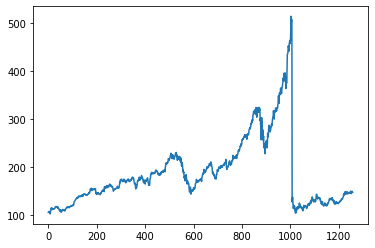

In [49]:
plt.plot(df1)

LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [50]:
import numpy as np

In [51]:
df1

0       105.80
1       105.66
2       106.14
3       107.70
4       107.90
         ...  
1253    148.31
1254    149.45
1255    149.81
1256    148.35
1257    147.48
Name: open, Length: 1258, dtype: float64

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [53]:
print(df1)

[[0.00764303]
 [0.00730334]
 [0.008468  ]
 ...
 [0.11442714]
 [0.11088465]
 [0.10877372]]


##splitting dataset into train and test split

In [54]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [55]:
training_size,test_size

(817, 441)

In [56]:
train_data

array([[0.00764303],
       [0.00730334],
       [0.008468  ],
       [0.01225312],
       [0.01273839],
       [0.01256854],
       [0.01116126],
       [0.00482846],
       [0.        ],
       [0.01179211],
       [0.01475227],
       [0.0271995 ],
       [0.03025671],
       [0.03042655],
       [0.02523414],
       [0.02717523],
       [0.02838841],
       [0.02855826],
       [0.02181298],
       [0.02511283],
       [0.02678701],
       [0.02550104],
       [0.02380259],
       [0.02440918],
       [0.02525841],
       [0.02608337],
       [0.02681128],
       [0.02829136],
       [0.03001407],
       [0.03651672],
       [0.03566749],
       [0.03430873],
       [0.03695346],
       [0.03561896],
       [0.03768137],
       [0.03542486],
       [0.03447858],
       [0.03435726],
       [0.0350609 ],
       [0.03712331],
       [0.02829136],
       [0.03091183],
       [0.02722376],
       [0.02668996],
       [0.02622895],
       [0.02123065],
       [0.02021158],
       [0.014

In [87]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [58]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [59]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [60]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [61]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [62]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [63]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 212ms/step - loss: 0.0079 - val_loss: 0.0346
Epoch 2/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0023 - val_loss: 0.0239
Epoch 3/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0011 - val_loss: 0.0210
Epoch 4/100
12/12 [==============================] - 2s 134ms/step - loss: 7.5316e-04 - val_loss: 0.0196
Epoch 5/100
12/12 [==============================] - 2s 137ms/step - loss: 5.2423e-04 - val_loss: 0.0207
Epoch 6/100
12/12 [==============================] - 2s 135ms/step - loss: 4.8974e-04 - val_loss: 0.0204
Epoch 7/100
12/12 [==============================] - 2s 136ms/step - loss: 4.5016e-04 - val_loss: 0.0199
Epoch 8/100
12/12 [==============================] - 2s 136ms/step - loss: 4.4737e-04 - val_loss: 0.0193
Epoch 9/100
12/12 [==============================] - 2s 138ms/step - loss: 4.2396e-04 - val_loss: 0.0190
Epoch 10/100
12/12 [==============================] - 2s 137ms/step

In [66]:
import tensorflow as tf

In [67]:
tf.__version__

'2.6.0'

In [68]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [69]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [70]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

183.1100279095509

In [71]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

221.0465271281818

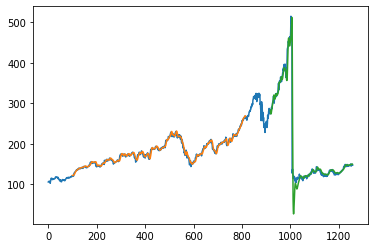

In [72]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [73]:
len(test_data)

441

In [74]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [75]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [77]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11413989]
101
1 day input [0.06587567 0.07247537 0.07228126 0.07834716 0.07562964 0.07679429
 0.07487747 0.07854127 0.07208715 0.07373708 0.07160188 0.07808026
 0.07851701 0.07681856 0.08205949 0.07067987 0.07131072 0.06924831
 0.06441986 0.06124133 0.06842335 0.06492939 0.05058961 0.05034697
 0.05321007 0.0572621  0.05864512 0.05801427 0.04976464 0.05478721
 0.06107148 0.05667977 0.06107148 0.05897268 0.0577231  0.05561217
 0.05442325 0.05248217 0.05345271 0.05197263 0.05706799 0.05811132
 0.0595914  0.05913039 0.05794148 0.06107148 0.06621536 0.0672587
 0.06587567 0.06808366 0.06708885 0.07152909 0.07550832 0.07715825
 0.07475615 0.07463483 0.07800747 0.08133159 0.08237492 0.08552919
 0.09079439 0.09920173 0.09445819 0.09729703 0.10569224 0.10040278
 0.11027806 0.11304411 0.11115155 0.09972339 0.09901975 0.10404232
 0.10502499 0.10894356 0.11069054 0.11275295 0.10229534 0.10199204
 0.101252   0.10605619 0.1047217  0.10826418 0.10756054 0.10603193
 0.10566798 0.1062503  0.10530402 

In [78]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [79]:
import matplotlib.pyplot as plt

In [80]:
len(df1)

1258

In [81]:
x_input.shape
yhat.shape

(1, 1)

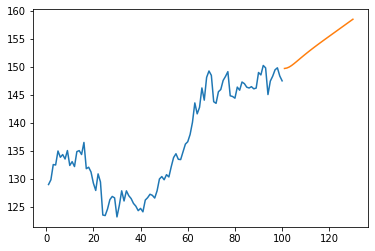

In [83]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

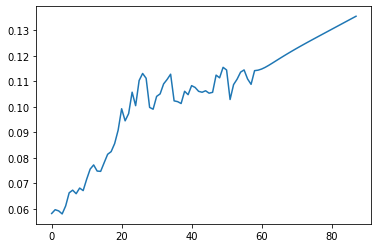

In [84]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [85]:
df3=scaler.inverse_transform(df3).tolist()

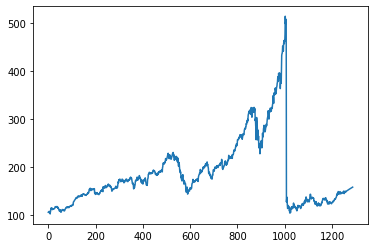

In [86]:
plt.plot(df3)